# **Bagian 1 : Model Bag of Words**

In [1]:
# contoh teks untuk training model
corpus = ["Saya sedang belajar Data Science",
          "Python merupakan salah satu tools Data Science",
          "Machine Learning adalah salah satu cabang data science",
          "Scikit learn membuat machine learning menjadi lebih mudah",
          "Banyak data data tersebar di internet"]

In [2]:
# inisialisasi model bag of words
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [3]:
# pelajari vocab pada corpus
vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [4]:
# melihat vocab
vect.get_feature_names()

['adalah',
 'banyak',
 'belajar',
 'cabang',
 'data',
 'di',
 'internet',
 'learn',
 'learning',
 'lebih',
 'machine',
 'membuat',
 'menjadi',
 'merupakan',
 'mudah',
 'python',
 'salah',
 'satu',
 'saya',
 'science',
 'scikit',
 'sedang',
 'tersebar',
 'tools']

In [5]:
# transformasikan list corpus ke dalam bentuk matrix
corpus_mat = vect.transform(corpus)
corpus_mat

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [6]:
# ubah sparse matrix menjadi dense matrix
corpus_mat.toarray()

array([[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0]])

In [7]:
# melihat arti dari fitur menggunakan pandas dataframe
import pandas as pd

pd.DataFrame(corpus_mat.toarray(), columns = vect.get_feature_names())

,adalah,banyak,belajar,cabang,data,di,internet,learn,learning,lebih,machine,membuat,menjadi,merupakan,mudah,python,salah,satu,saya,science,scikit,sedang,tersebar,tools
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0
4,0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
# tes model
new_sent = ["Saya sedang belajar di kelas data science"]

In [9]:
# transformasi teks baru ke dalam matrix
new_sent_mat = vect.transform(new_sent)

In [10]:
# lihat data yang sudah ditransformasi
pd.DataFrame(new_sent_mat.toarray(), columns=vect.get_feature_names())

,adalah,banyak,belajar,cabang,data,di,internet,learn,learning,lebih,machine,membuat,menjadi,merupakan,mudah,python,salah,satu,saya,science,scikit,sedang,tersebar,tools
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0


# **Bagian 2 : Membuat Deteksi SMS Spam**

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('dataset_sms_spam _v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [13]:
# Ubah label
df['label'] = df.label.map({0 : "SMS Biasa", 1 : "SMS Penipuan", 2 : "SMS Operator"})

In [14]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,SMS Operator
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,SMS Operator
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",SMS Operator
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",SMS Operator
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,SMS Operator


In [15]:
# lihat ukuran data
df.shape

(1143, 2)

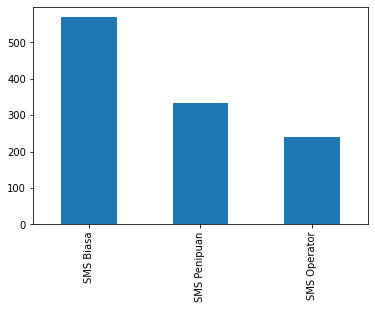

In [17]:
# lihat distribusi kelas
import matplotlib.pyplot as plt

df.label.value_counts().plot(kind='bar')
plt.show()

In [18]:
# Split data menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Teks, df.label, test_size = 0.2)

In [19]:
X_train.shape

(914,)

In [20]:
X_test.shape

(229,)

Vectorisasi

In [21]:
# Inisialisasi vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [22]:
# Pelajari vocab dan ubah data train ke dalam matrix
vect.fit(X_train)
X_train_vec = vect.transform(X_train)

In [23]:
# lihat vektor fitur
X_train_vec

<914x4279 sparse matrix of type '<class 'numpy.int64'>'
	with 15302 stored elements in Compressed Sparse Row format>

In [24]:
# lakukan hal yang sama dengan data testing tanpa harus di fit
X_test_vec = vect.transform(X_test)

Klasifikasi

In [25]:
# import model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [26]:
# training data
%timeit nb.fit(X_train_vec, y_train)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 3.2 ms per loop


In [27]:
# buat prediksi ke data testing
y_pred = nb.predict(X_test_vec)

In [28]:
# tampilkan hasil evaluasi model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.97      0.96      0.96       113
SMS Operator       0.82      0.95      0.88        44
SMS Penipuan       0.99      0.92      0.95        72

    accuracy                           0.94       229
   macro avg       0.93      0.94      0.93       229
weighted avg       0.95      0.94      0.94       229



Inference

In [32]:
# coba sms baru
new_sms = ["Hai bro apa kabarmu?",
           "Kuota harian hanya 1000 rupiah per gb, kunjungi aplikasi mygsm",
           "Pesugihan halal, lipatkan gandakan uang anda bersama nyai siti",
           "Besok selasa jalan jalan yuk ke semarang cari makan"]

new_sms_vect = vect.transform(new_sms)

In [33]:
hasil = nb.predict(new_sms_vect)

In [34]:
print(hasil)

['SMS Biasa' 'SMS Operator' 'SMS Penipuan' 'SMS Biasa']
